# Hidden Markov Model

Markov models allows estimations on the probability of outcomes (observation sequence) based on the current state of a system. Even if the states are "hidden".

## Market regime estimate

In [1]:
library('depmixS4')
library('quantmod')
set.seed(1)

Loading required package: nnet

Loading required package: MASS

Loading required package: Rsolnp

Loading required package: nlme

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Bullish - postive mean, low var ; Bearish - neg mean, high var

There will be k=5 regimes, (bull or bear) and in each regime N=[50,150] days of return. Both with a normal dist.

In [2]:
# Create the parameters for the bull and
# bear market returns distributions
Nk_lower <- 50
Nk_upper <- 150
bull_mean <- 0.1
bull_var <- 0.1
bear_mean <- -0.05
bear_var <- 0.2

In [3]:
# Create the list of durations (in days) for each regime
days <- replicate(5, sample(Nk_lower:Nk_upper, 1))

In [4]:
#Returns for the kth period:
# Create the various bull and bear markets returns
market_bull_1 <- rnorm( days[1], bull_mean, bull_var ) 
market_bear_2 <- rnorm( days[2], bear_mean, bear_var ) 
market_bull_3 <- rnorm( days[3], bull_mean, bull_var ) 
market_bear_4 <- rnorm( days[4], bear_mean, bear_var ) 
market_bull_5 <- rnorm( days[5], bull_mean, bull_var )

In [5]:
# Create the list of true regime states and full returns list
true_regimes <- c( rep(1,days[1]), rep(2,days[2]), rep(1,days[3]), rep(2,days[4]), rep(1,days[5])) #List of states
returns <- c( market_bull_1, market_bear_2, market_bull_3, market_bear_4, market_bull_5) # List of kth returns

The HMM is fit using expectation maximisation algorithm (to find the max likelihood or maximum a posteriori). Uses the set of values to determine the two differnet states.

In [7]:
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 2, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = TRUE)

iteration 0 logLik: 205.1854 
iteration 5 logLik: 214.4124 
iteration 10 logLik: 239.9149 
iteration 15 logLik: 280.5759 
iteration 20 logLik: 289.6389 
converged at iteration 21 with logLik: 289.6389 


Can now plot the prob of being in each state using the trained model.

Warning message in .local(object, ...):
“Argument 'type' not specified and will default to 'viterbi'. This default may change in future releases of depmixS4. Please see ?posterior for alternative options.”


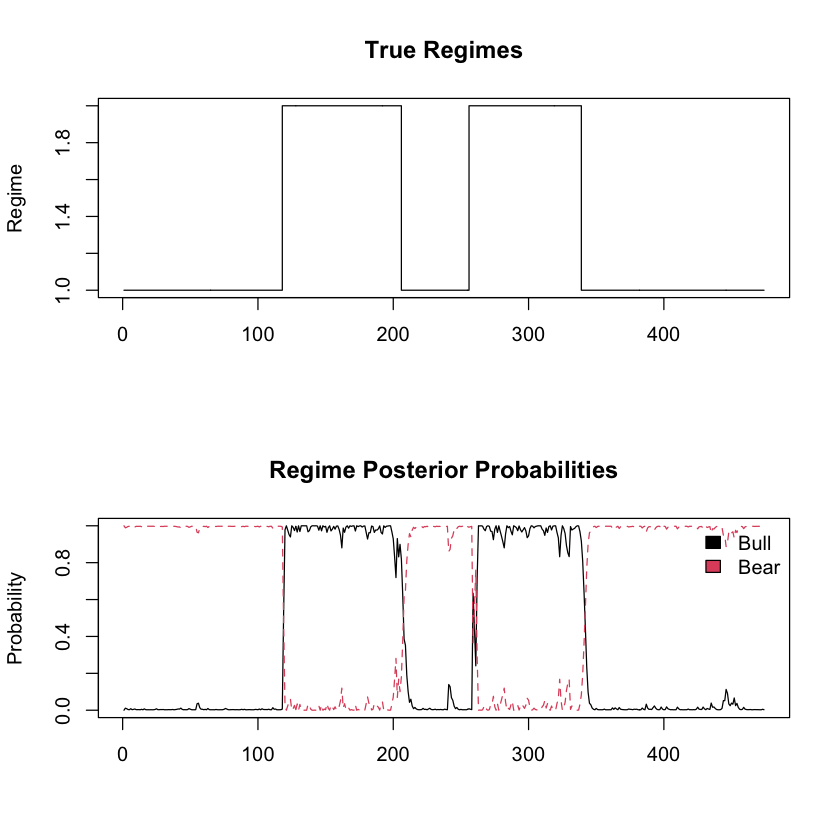

In [8]:
# Output both the true regimes and the 
# posterior probabilities of the regimes
post_probs <- posterior(hmmfit)
layout(1:2)
plot(true_regimes, type='s', main='True Regimes', xlab='', ylab='Regime')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='topright', c('Bull','Bear'), fill=1:2, bty='n')

Real world scenarios will be a lot less clear cut as the values will not be based of simulated gaussian values. There may also be an element of unsupervised learning as the response values are not clearly defined.